# Q1

## Which geographical areas (e.g. zip codes or census tracts) see the highest eviction density each year and over time?

## For 2017

In [1]:
pip install folium pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageSequence

In [3]:
import pandas as pd
import numpy as np

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
data_2017 = pd.read_excel("/Users/namse/Downloads/Eviction Report 2017.xlsx")
data_2018 = pd.read_excel("/Users/namse/Downloads/Eviction Report 2018.xlsx")
data_2019 = pd.read_excel("/Users/namse/Downloads/Eviction Report 2019.xlsx")
data_2020 = pd.read_excel("/Users/namse/Downloads/Eviction Report 2020.xlsx")
data_2021 = pd.read_excel("/Users/namse/Downloads/Eviction Report 2021.xlsx")

In [6]:
data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Agent,"Strasdin, Donna L",,NaN,NaN,NaN,2022-02-15 11:35:27
1,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Covert, Karen L",PO Box 94531,Las Vegas,NV,89193,2022-02-15 11:35:27
2,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Beverly, Keyon",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
3,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Charles, Tiffany",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
4,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Landlord,Regency Place,2820 South Decatur Blvd,Las Vegas,NV,89102,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123480,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Walccs Group,370 E. Harmon Ave,Las Vegas,NV,89169,2022-02-15 11:35:27
123481,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Demoura, Patrick",370 E. Harmon Ave. #B-322,Las Vegas,NV,89169,2022-02-15 11:35:27
123482,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032519,2017-12-29,Summary Eviction,Summary Judgment,2018-01-04 00:00:00,Agent,"Renteria, Maribel",,NaN,NaN,NaN,2022-02-15 11:35:27
123483,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032519,2017-12-29,Summary Eviction,Summary Judgment,2018-01-04 00:00:00,Landlord,Heritage Square LLC,4255 Tamarus St.,Las Vegas,NV,89119,2022-02-15 11:35:27


In [7]:
data_2017['City'].nunique()

450

In [8]:
data_2017.isnull().sum()

CaseReportPeriod          0
CaseNumber                0
CaseFileDate              0
EvictionFilingType        0
ResolutionType           42
ResolutionDate            0
CaseParties               0
PartyName                 6
PartyAddress              0
City                  31283
State                 31283
Zipcode               31283
RetrievalDate             0
dtype: int64

In [9]:
new_data_2017 = data_2017.dropna(axis = 0)

In [10]:
new_data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Covert, Karen L",PO Box 94531,Las Vegas,NV,89193,2022-02-15 11:35:27
2,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Beverly, Keyon",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
3,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Charles, Tiffany",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
4,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Landlord,Regency Place,2820 South Decatur Blvd,Las Vegas,NV,89102,2022-02-15 11:35:27
5,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Tenant,"Chaisson, Chrystal",2800 South Decatur Blvd #15,Las Vegas,NV,89102,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123478,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032517,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Munro, Nicole",370 E. Harmon Ave. #F-205,Las Vegas,NV,89169,2022-02-15 11:35:27
123480,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Walccs Group,370 E. Harmon Ave,Las Vegas,NV,89169,2022-02-15 11:35:27
123481,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Demoura, Patrick",370 E. Harmon Ave. #B-322,Las Vegas,NV,89169,2022-02-15 11:35:27
123483,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032519,2017-12-29,Summary Eviction,Summary Judgment,2018-01-04 00:00:00,Landlord,Heritage Square LLC,4255 Tamarus St.,Las Vegas,NV,89119,2022-02-15 11:35:27


### Grouping by Zip Code in 2017

In [11]:
grouping_2017 = new_data_2017.groupby('Zipcode')

In [12]:
grouped_2017 = grouping_2017.size().reset_index(name = 'Count')

In [13]:
sorted_2017 = grouped_2017.sort_values(by = 'Count', ascending = False)
sorted_2017

,Zipcode,Count
155,89119,6836
157,89121,6349
196,89169,6107
137,89101,5689
151,89115,5507
...,...,...
466,93905,1
91,85206,1
329,91381,1
287,90731,1


## For 2018

In [14]:
data_2018

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Agent,"Chan, Siu",,NaN,NaN,NaN,2022-02-15 11:35:48
1,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,"Chan, Sunny C",8065 Retriver Ave,Las Vegas,NV,89147,2022-02-15 11:35:48
2,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Herrera Gonzalez, Jose",5600 Shuttle Ct,Las Vegas,NV,89103,2022-02-15 11:35:48
3,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Agent,"Corley, Cheryl Ann",,NaN,NaN,NaN,2022-02-15 11:35:48
4,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Agent,Cornerstone,PO Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118084,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Tenant,All Residing In Unit #3,1125 Tamerack Ave #3,Las Vegas,NV,89106,2022-02-15 11:35:48
118085,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Agent,"Williamson, James",,NaN,NaN,NaN,2022-02-15 11:35:48
118086,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Landlord,"Williamson, Mattia",1125 Tamerack Ave,Las Vegas,NV,89106,2022-02-15 11:35:48
118087,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Occupant,"Price, Nicholas",1125 Tamarack St,Las Vegas,NV,89106,2022-02-15 11:35:48


In [15]:
data_2018.isnull().sum()

CaseReportPeriod          0
CaseNumber                0
CaseFileDate              0
EvictionFilingType        0
ResolutionType          113
ResolutionDate            0
CaseParties               0
PartyName                 0
PartyAddress              0
City                  29162
State                 29162
Zipcode               29162
RetrievalDate             0
dtype: int64

In [16]:
new_data_2018 = data_2018.dropna(axis = 0)

In [17]:
new_data_2018

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,"Chan, Sunny C",8065 Retriver Ave,Las Vegas,NV,89147,2022-02-15 11:35:48
2,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Herrera Gonzalez, Jose",5600 Shuttle Ct,Las Vegas,NV,89103,2022-02-15 11:35:48
4,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Agent,Cornerstone,PO Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
6,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Landlord,"Lim, Gabriella",P O Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
7,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Landlord,"Lim, John",P O Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118083,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Occupant,"Price, Nicholas",1125 Tamarack St,Las Vegas,NV,89106,2022-02-15 11:35:48
118084,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Tenant,All Residing In Unit #3,1125 Tamerack Ave #3,Las Vegas,NV,89106,2022-02-15 11:35:48
118086,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Landlord,"Williamson, Mattia",1125 Tamerack Ave,Las Vegas,NV,89106,2022-02-15 11:35:48
118087,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Occupant,"Price, Nicholas",1125 Tamarack St,Las Vegas,NV,89106,2022-02-15 11:35:48


###  Grouping by Zip Code in 2018

In [18]:
grouping_2018 = new_data_2018.groupby('Zipcode')

In [19]:
grouped_2018 = grouping_2018.size().reset_index(name = 'Count')
grouped_2018

,Zipcode,Count
0,1603,1
1,3046,2
2,6859,1
3,7458,1
4,7974,2
...,...,...
609,89178-5541,4
610,89193-3625,19
611,90009-2972,1
612,92336-5505,1


In [20]:
sorted_2018 = grouped_2018.sort_values(by = 'Count' , ascending = False)
sorted_2018

,Zipcode,Count
161,89119,6601
163,89121,5938
157,89115,5498
144,89101,5404
205,89169,4755
...,...,...
310,91108,1
304,91012,1
296,90804,1
294,90748,1


## For 2019

In [21]:
data_2019

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2019 ...,190,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Agent,"Terry, Donald",,NaN,NaN,NaN,2022-02-15 11:36:03
1,LVJC CASE REPORT for the period of 1/1/2019 ...,190,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Landlord,Emerald Suites,3684 Paradise Rd.,Las Vegas,NV,89169,2022-02-15 11:36:03
2,LVJC CASE REPORT for the period of 1/1/2019 ...,190,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Tenant,"Bracken, Victoria",3684 Paradise Rd. #J3115,Las Vegas,NV,89169,2022-02-15 11:36:03
3,LVJC CASE REPORT for the period of 1/1/2019 ...,1900,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Landlord,N H CORNERSTONE PROPERTY OWNER LLC,6666 W. Washington Ave.,Las Vegas,NV,89107,2022-02-15 11:36:03
4,LVJC CASE REPORT for the period of 1/1/2019 ...,1900,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Tenant,"Horton, Lynette",6666 W. Washington Ave. Apt. 349,Las Vegas,NV,89107,2022-02-15 11:36:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107614,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030339,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Tenant,"Smith, Robert",2938 Gables Vale Ct,Las Vegas,NV,89121,2022-02-15 11:36:03
107615,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030340,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Agent,"Vldrine, Nathan",,NaN,NaN,NaN,2022-02-15 11:36:03
107616,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030340,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Landlord,Tulip Real Estate LLC,3650 E Russell Rd,Las Vegas,NV,89120,2022-02-15 11:36:03
107617,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030340,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Tenant,Angelica's Business LLC,3021 E Charleston Blvd #A & #B,Las Vegas,NV,89104,2022-02-15 11:36:03


In [22]:
data_2019.isnull().sum()

CaseReportPeriod          0
CaseNumber                0
CaseFileDate              0
EvictionFilingType        0
ResolutionType           49
ResolutionDate            0
CaseParties               0
PartyName                 0
PartyAddress              0
City                  26700
State                 26700
Zipcode               26700
RetrievalDate             0
dtype: int64

In [23]:
new_data_2019  = data_2019.dropna(axis = 0)
new_data_2019

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2019 ...,190,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Landlord,Emerald Suites,3684 Paradise Rd.,Las Vegas,NV,89169,2022-02-15 11:36:03
2,LVJC CASE REPORT for the period of 1/1/2019 ...,190,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Tenant,"Bracken, Victoria",3684 Paradise Rd. #J3115,Las Vegas,NV,89169,2022-02-15 11:36:03
3,LVJC CASE REPORT for the period of 1/1/2019 ...,1900,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Landlord,N H CORNERSTONE PROPERTY OWNER LLC,6666 W. Washington Ave.,Las Vegas,NV,89107,2022-02-15 11:36:03
4,LVJC CASE REPORT for the period of 1/1/2019 ...,1900,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Tenant,"Horton, Lynette",6666 W. Washington Ave. Apt. 349,Las Vegas,NV,89107,2022-02-15 11:36:03
5,LVJC CASE REPORT for the period of 1/1/2019 ...,19000,2019-01-01,Summary Eviction,Summary Judgment,2019-01-02 00:00:00,Landlord,N H CORNERSTONE PROPERTY OWNER LLC,6666 W. Washington Ave.,Las Vegas,NV,89107,2022-02-15 11:36:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107613,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030339,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Landlord,American Homes 4 Rent,280 Pilot Road Suite 200,Las Vegas,NV,89119,2022-02-15 11:36:03
107614,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030339,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Tenant,"Smith, Robert",2938 Gables Vale Ct,Las Vegas,NV,89121,2022-02-15 11:36:03
107616,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030340,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Landlord,Tulip Real Estate LLC,3650 E Russell Rd,Las Vegas,NV,89120,2022-02-15 11:36:03
107617,LVJC CASE REPORT for the period of 1/1/2019 ...,19E030340,2019-12-31,Summary Eviction,Summary Judgment,2020-01-03 00:00:00,Tenant,Angelica's Business LLC,3021 E Charleston Blvd #A & #B,Las Vegas,NV,89104,2022-02-15 11:36:03


###  Grouping by Zip Code in 2019

In [24]:
grouping_2019 = new_data_2019.groupby('Zipcode')

In [25]:
grouped_2019 = grouping_2019.size()

In [26]:
grouped_2019

Zipcode
2124          1
2151          2
2199          8
2421          6
6457          1
             ..
89178-6232    1
89178-8298    2
89193-3625    4
89193-8378    1
95070-0282    8
Length: 532, dtype: int64

In [27]:
new_2019 = grouped_2019.reset_index(name = 'Count')

In [28]:
sorted_2019 = new_2019.sort_values(by = 'Count', ascending = False)

In [29]:
sorted_2019

,Zipcode,Count
137,89119,6029
139,89121,4934
119,89101,4841
120,89102,4510
177,89169,4442
...,...,...
301,91606,1
302,91701,1
306,91746,1
308,91755,1


## For 2020

In [30]:
data_2020

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2020 ...,10E019310,2020-11-19,Summary Eviction,Summary Judgment,2010-11-19 00:00:00,Agent,"Villanueva-Perez, Dilcia",,NaN,NaN,NaN,2022-02-15 11:36:57
1,LVJC CASE REPORT for the period of 1/1/2020 ...,10E019310,2020-11-19,Summary Eviction,Summary Judgment,2010-11-19 00:00:00,Landlord,Oasis A Camden Company,7101 Smoke Ranch,Las Vegas,NV,89128,2022-02-15 11:36:57
2,LVJC CASE REPORT for the period of 1/1/2020 ...,10E019310,2020-11-19,Summary Eviction,Summary Judgment,2010-11-19 00:00:00,Tenant,"Thompson, Numarl",7101 Smoke Ranch 2048,Las Vegas,NV,89128,2022-02-15 11:36:57
3,LVJC CASE REPORT for the period of 1/1/2020 ...,200,2020-01-02,Summary Eviction,Summary Judgment,2020-01-29 00:00:00,Agent,"Guerrero, Blanca",,NaN,NaN,NaN,2022-02-15 11:36:57
4,LVJC CASE REPORT for the period of 1/1/2020 ...,200,2020-01-02,Summary Eviction,Summary Judgment,2020-01-29 00:00:00,Agent,"MENDEZ, ESTRELLA",,NaN,NaN,NaN,2022-02-15 11:36:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59918,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Tenant,Cubers Golf Cars,5752 S. Fort Apache Road,Las Vegas,NV,89148,2022-02-15 11:36:57
59919,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Agent,"Dunbar, Yvonne",,NaN,NaN,NaN,2022-02-15 11:36:57
59920,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Landlord,Kirpa LLC c/o Sun Property Management,19161 Park Run Drive #150,Las Vegas,NV,89145,2022-02-15 11:36:57
59921,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Occupant,"Schiller, Bruce",5752 S Ft. Apache,Las Vegas,NV,89148,2022-02-15 11:36:57


In [31]:
data_2020.isnull().sum()

CaseReportPeriod          0
CaseNumber                0
CaseFileDate              0
EvictionFilingType        0
ResolutionType          624
ResolutionDate            0
CaseParties               0
PartyName                 0
PartyAddress              0
City                  12478
State                 12478
Zipcode               12478
RetrievalDate             0
dtype: int64

In [32]:
new_data_2020 = data_2020.dropna(axis = 0)

In [33]:
new_data_2020

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2020 ...,10E019310,2020-11-19,Summary Eviction,Summary Judgment,2010-11-19 00:00:00,Landlord,Oasis A Camden Company,7101 Smoke Ranch,Las Vegas,NV,89128,2022-02-15 11:36:57
2,LVJC CASE REPORT for the period of 1/1/2020 ...,10E019310,2020-11-19,Summary Eviction,Summary Judgment,2010-11-19 00:00:00,Tenant,"Thompson, Numarl",7101 Smoke Ranch 2048,Las Vegas,NV,89128,2022-02-15 11:36:57
5,LVJC CASE REPORT for the period of 1/1/2020 ...,200,2020-01-02,Summary Eviction,Summary Judgment,2020-01-29 00:00:00,Landlord,Pacifica L34 LLC,3700 E Bonanza Rd,Las Vegas,NV,89110,2022-02-15 11:36:57
6,LVJC CASE REPORT for the period of 1/1/2020 ...,200,2020-01-02,Summary Eviction,Summary Judgment,2020-01-29 00:00:00,Tenant,"Smoot, Michele",3700 E Bonanza Rd #25-2159,Las Vegas,NV,89110,2022-02-15 11:36:57
9,LVJC CASE REPORT for the period of 1/1/2020 ...,200,2020-01-02,Summary Eviction,Summary Judgment,2020-01-29 00:00:00,Landlord,Pacifica L34 LLC,3700 E Bonanza Rd,Las Vegas,NV,89110,2022-02-15 11:36:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59917,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Occupant,"Schiller, Bruce",5752 S Ft. Apache,Las Vegas,NV,89148,2022-02-15 11:36:57
59918,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Tenant,Cubers Golf Cars,5752 S. Fort Apache Road,Las Vegas,NV,89148,2022-02-15 11:36:57
59920,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Landlord,Kirpa LLC c/o Sun Property Management,19161 Park Run Drive #150,Las Vegas,NV,89145,2022-02-15 11:36:57
59921,LVJC CASE REPORT for the period of 1/1/2020 ...,20E018007,2020-12-31,Summary Eviction,Summary Judgment,2021-01-05 00:00:00,Occupant,"Schiller, Bruce",5752 S Ft. Apache,Las Vegas,NV,89148,2022-02-15 11:36:57


###  Grouping by Zip Code in 2020

In [34]:
grouping_2020 = new_data_2020.groupby('Zipcode')

In [35]:
grouping_2020.size()

Zipcode
2446          4
6055          1
7306          2
8536          2
8844          6
             ..
89183-6326    1
89183-7109    4
89193-4879    1
89193-8378    2
91715-1744    9
Length: 377, dtype: int64

In [36]:
grouped_2020 = grouping_2020.size().reset_index(name = 'Count')

In [37]:
sorted_2020 = grouped_2020.sort_values(by = 'Count', ascending = False)

## For 2021

In [38]:
data_2021

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2021 ...,210,2021-01-01,Summary Eviction,Involuntary (statutory) Dismissal,2021-07-12 00:00:00,Landlord,Harbor Island Apartment,370 E Harmon Ave,Las Vegas,NV,89169,2022-02-15 11:36:00
1,LVJC CASE REPORT for the period of 1/1/2021 ...,210,2021-01-01,Summary Eviction,Involuntary (statutory) Dismissal,2021-07-12 00:00:00,Tenant,"Moore, Tanisha Ann",370 E Harmon Ave C/215,Las Vegas,NV,89169,2022-02-15 11:36:00
2,LVJC CASE REPORT for the period of 1/1/2021 ...,2100,2021-01-01,Summary Eviction,Summary Judgment,2021-02-01 00:00:00,Agent,"McCurdy, Joseph",,NaN,NaN,NaN,2022-02-15 11:36:00
3,LVJC CASE REPORT for the period of 1/1/2021 ...,2100,2021-01-01,Summary Eviction,Summary Judgment,2021-02-01 00:00:00,Landlord,Sahara LV Holdings LLC,2500 Teddy Drive,Las Vegas,NV,89102,2022-02-15 11:36:00
4,LVJC CASE REPORT for the period of 1/1/2021 ...,2100,2021-01-01,Summary Eviction,Summary Judgment,2021-02-01 00:00:00,Tenant,"Pruna, Irene",2713 W. Sahara Ave #16,Las Vegas,NV,89102,2022-02-15 11:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108565,LVJC CASE REPORT for the period of 1/1/2021 ...,21E033175,2021-12-31,Summary Eviction,Summary Judgment,2022-01-10 00:00:00,Tenant,"Clemensen, Angela",7784 Hunters Lodge Ct,Las Vegas,NV,89113,2022-02-15 11:36:00
108566,LVJC CASE REPORT for the period of 1/1/2021 ...,21E033175,2021-12-31,Summary Eviction,Summary Judgment,2022-01-10 00:00:00,Tenant,"Clemensen, Ashleigh",7784 Hunters Lodge Ct,Las Vegas,NV,89113,2022-02-15 11:36:00
108567,LVJC CASE REPORT for the period of 1/1/2021 ...,21E033177,2021-12-31,Summary Eviction,Summary Judgment,2022-01-10 00:00:00,Agent,"Batsford, Penny",6555 Boulder Highway,Las Vegas,NV,89122,2022-02-15 11:36:00
108568,LVJC CASE REPORT for the period of 1/1/2021 ...,21E033177,2021-12-31,Summary Eviction,Summary Judgment,2022-01-10 00:00:00,Landlord,Wabash Hillcrest Regency LP,6555 Bouder Highway,Las Vegas,NV,89122,2022-02-15 11:36:00


In [39]:
data_2021.isnull().sum()

CaseReportPeriod          0
CaseNumber                0
CaseFileDate              0
EvictionFilingType        0
ResolutionType         5328
ResolutionDate            0
CaseParties               0
PartyName                 0
PartyAddress              0
City                  16000
State                 15998
Zipcode               15998
RetrievalDate             0
dtype: int64

In [40]:
new_data_2021 = data_2021.dropna(axis = 0)

###  Grouping by Zip Code in 2021

In [41]:
grouping_2021 = new_data_2021.groupby('Zipcode')

In [42]:
grouping_2021.size().reset_index(name = 'Count')

,Zipcode,Count
0,646,1
1,2124,2
2,2155,2
3,8850,1
4,10128,1
...,...,...
475,89135-2079,1
476,89148-5517,3
477,89169-7110,1
478,89173-1317,1


In [43]:
grouped_2021 = grouping_2021.size().reset_index(name = 'Count').sort_values(by ='Count', ascending = False)

In [44]:
grouped_2021

,Zipcode,Count
144,89119,8004
187,89169,5859
146,89121,5384
127,89101,5030
128,89102,4618
...,...,...
346,92139,1
89,88121,1
348,92260,1
87,88115,1


--------------------------------------------------------------

# Q2

##  Are certain landlords filing a disproportionate number of eviction cases?

In [45]:
data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Agent,"Strasdin, Donna L",,NaN,NaN,NaN,2022-02-15 11:35:27
1,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Covert, Karen L",PO Box 94531,Las Vegas,NV,89193,2022-02-15 11:35:27
2,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Beverly, Keyon",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
3,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Charles, Tiffany",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
4,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Landlord,Regency Place,2820 South Decatur Blvd,Las Vegas,NV,89102,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123480,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Walccs Group,370 E. Harmon Ave,Las Vegas,NV,89169,2022-02-15 11:35:27
123481,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Demoura, Patrick",370 E. Harmon Ave. #B-322,Las Vegas,NV,89169,2022-02-15 11:35:27
123482,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032519,2017-12-29,Summary Eviction,Summary Judgment,2018-01-04 00:00:00,Agent,"Renteria, Maribel",,NaN,NaN,NaN,2022-02-15 11:35:27
123483,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032519,2017-12-29,Summary Eviction,Summary Judgment,2018-01-04 00:00:00,Landlord,Heritage Square LLC,4255 Tamarus St.,Las Vegas,NV,89119,2022-02-15 11:35:27


In [46]:
land_data_2017 = data_2017[data_2017['CaseParties'] == 'Landlord']

In [47]:
land_data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Covert, Karen L",PO Box 94531,Las Vegas,NV,89193,2022-02-15 11:35:27
4,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Landlord,Regency Place,2820 South Decatur Blvd,Las Vegas,NV,89102,2022-02-15 11:35:27
6,LVJC CASE REPORT for the period of 1/1/2017 ...,17000,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Cafferata, Carlos",522 Wardelle St #A,Las Vegas,NV,89101,2022-02-15 11:35:27
9,LVJC CASE REPORT for the period of 1/1/2017 ...,170000,2017-01-02,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,South Valley,10250 Spencer Street,Las Vegas,NV,89183,2022-02-15 11:35:27
12,LVJC CASE REPORT for the period of 1/1/2017 ...,170000,2017-01-02,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,South Valley,10250 Spencer Street,Las Vegas,NV,89183,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123469,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032515,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Waiccs Group,370 E. Harmon Ave.,Las Vegas,NV,89169,2022-02-15 11:35:27
123473,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032516,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Waiccs Group,370 E. Harmon Ave.,Las Vegas,NV,89169,2022-02-15 11:35:27
123476,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032517,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Waiccs Group,370 E. Harmon Ave.,Las Vegas,NV,89169,2022-02-15 11:35:27
123480,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Walccs Group,370 E. Harmon Ave,Las Vegas,NV,89169,2022-02-15 11:35:27


In [48]:
land_data_2017['PartyName'].nunique()

9167

In [49]:
land_data_2017['PartyName'].value_counts()

Stout Management                              591
Stout Management Company                      457
Shamrock Communities LLC                      451
Southern Nevada Regional Housing Authority    388
New Vegas Holdings Company LLC                365
                                             ... 
Dolce by the Lake LLC                           1
MLK Capital LLC                                 1
Chu Family Trust                                1
Swanson, Kurt                                   1
Smith, Dawson                                   1
Name: PartyName, Length: 9167, dtype: int64

In [50]:
land_data_2017['PartyName'].value_counts().reset_index(name = 'Count').head(10)

,index,Count
0,Stout Management,591
1,Stout Management Company,457
2,Shamrock Communities LLC,451
3,Southern Nevada Regional Housing Authority,388
4,New Vegas Holdings Company LLC,365
5,Prime Residential,364
6,Olen Residential Realty Corp,329
7,Waiccs Group,264
8,Ovation Property Management,253
9,Sportsmans Royal Manor,241


### About Stout Management in 2017

In [51]:
first_data_2017 = land_data_2017[land_data_2017['PartyName'] == 'Stout Management']
first_data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
794,LVJC CASE REPORT for the period of 1/1/2017 ...,1699999999999999994830947186503460041954226898...,2017-01-05,Summary Eviction,Summary Judgment,2017-01-24 00:00:00,Landlord,Stout Management,1500 East Viking Rd,Las Vegas,NV,89119,2022-02-15 11:35:27
1601,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000416,2017-01-10,Summary Eviction,Summary Judgment,2017-01-23 00:00:00,Landlord,Stout Management,4550 Karen Ave,Las Vegas,NV,89121,2022-02-15 11:35:27
3023,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000773,2017-01-13,Summary Eviction,Summary Judgment,2017-01-17 00:00:00,Landlord,Stout Management,4255 S Channel 10 Dr,Las Vegas,NV,89119,2022-02-15 11:35:27
3067,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000784,2017-01-13,Summary Eviction,Summary Judgment,2017-01-17 00:00:00,Landlord,Stout Management,4255 S Channel 10 Dr,Las Vegas,NV,89119,2022-02-15 11:35:27
3178,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000809,2017-01-13,Summary Eviction,Summary Judgment,2017-01-18 00:00:00,Landlord,Stout Management,4255 S. Channel 10 Dr.,Las Vegas,NV,89119,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120789,LVJC CASE REPORT for the period of 1/1/2017 ...,17E031747,2017-12-20,Summary Eviction,Summary Judgment,2017-12-21 00:00:00,Landlord,Stout Management,3540 N Hualapai Way,Las Vegas,NV,89129,2022-02-15 11:35:27
120889,LVJC CASE REPORT for the period of 1/1/2017 ...,17E031776,2017-12-20,Summary Eviction,Voluntary Dismissal,2017-12-21 00:00:00,Landlord,Stout Management,3650 Stober Blvd.,Las Vegas,NV,89103,2022-02-15 11:35:27
120939,LVJC CASE REPORT for the period of 1/1/2017 ...,17E031792,2017-12-20,Summary Eviction,Summary Judgment,2017-12-21 00:00:00,Landlord,Stout Management,3650 Stober Blvd.,Las Vegas,NV,89103,2022-02-15 11:35:27
121470,LVJC CASE REPORT for the period of 1/1/2017 ...,17E031938,2017-12-20,Summary Eviction,Summary Judgment,2017-12-21 00:00:00,Landlord,Stout Management,3800 Wynn road,Las Vegas,NV,89103,2022-02-15 11:35:27


In [52]:
first_data_2017['EvictionFilingType'].unique()

array(['Summary Eviction'], dtype=object)

In [53]:
first_data_2017['ResolutionType'].unique()

array(['Summary Judgment', 'Involuntary (statutory) Dismissal',
       'Voluntary Dismissal', 'Default Judgment'], dtype=object)

### About Stout Management in 2017 - Resolution Type

In [54]:
stout_2017 = first_data_2017['ResolutionType'].value_counts().reset_index(name ='Counts')

In [55]:
stout_2017

,index,Counts
0,Summary Judgment,571
1,Voluntary Dismissal,14
2,Involuntary (statutory) Dismissal,5
3,Default Judgment,1


### About Stout Management in 2017 - Zip Code

In [56]:
stout_2017_zip = first_data_2017['Zipcode'].value_counts().reset_index(name = 'Counts')

In [57]:
stout_2017_zip

,index,Counts
0,89103,157
1,89121,109
2,89119,94
3,89146,59
4,89108,46
5,89142,29
6,89139,24
7,89183,20
8,89129,16
9,89149,11


### About Stout Management Company in 2017

In [58]:
second_data_2017 = land_data_2017[land_data_2017['PartyName'] == 'Stout Management Company']

In [59]:
second_data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
2854,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000738,2017-01-13,Summary Eviction,Summary Judgment,2017-01-25 00:00:00,Landlord,Stout Management Company,1374 E Desert Inn,Las Vegas,NV,89169,2022-02-15 11:35:27
2857,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000738,2017-01-13,Summary Eviction,Summary Judgment,2017-01-25 00:00:00,Landlord,Stout Management Company,1374 E Desert Inn,Las Vegas,NV,89169,2022-02-15 11:35:27
2860,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000738,2017-01-13,Summary Eviction,Summary Judgment,2017-01-25 00:00:00,Landlord,Stout Management Company,1374 E Desert Inn,Las Vegas,NV,89169,2022-02-15 11:35:27
3279,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000838,2017-01-13,Summary Eviction,Summary Judgment,2017-01-18 00:00:00,Landlord,Stout Management Company,2901 N. Rainbow Blvd,Las Vegas,NV,89108,2022-02-15 11:35:27
3342,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000856,2017-01-13,Summary Eviction,Summary Judgment,2017-01-17 00:00:00,Landlord,Stout Management Company,5225 E. Charleston Blvd,Las Vegas,NV,89142,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121247,LVJC CASE REPORT for the period of 1/1/2017 ...,17E031884,2017-12-20,Summary Eviction,Summary Judgment,2017-12-21 00:00:00,Landlord,Stout Management Company,517 N 28th st,Las Vegas,NV,89101,2022-02-15 11:35:27
121483,LVJC CASE REPORT for the period of 1/1/2017 ...,17E031942,2017-12-20,Summary Eviction,Summary Judgment,2017-12-22 00:00:00,Landlord,Stout Management Company,7413 W Russell Rd,Las Vegas,NV,89113,2022-02-15 11:35:27
122447,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032224,2017-12-26,Summary Eviction,Summary Judgment,2017-12-27 00:00:00,Landlord,Stout Management Company,3600 Swenson St,Las Vegas,NV,89169,2022-02-15 11:35:27
122521,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032245,2017-12-26,Summary Eviction,Summary Judgment,2017-12-28 00:00:00,Landlord,Stout Management Company,3600 Swenson St,Las Vegas,NV,89169,2022-02-15 11:35:27


In [60]:
second_data_2017['EvictionFilingType'].unique()

array(['Summary Eviction'], dtype=object)

In [61]:
second_data_2017['ResolutionType'].unique()

array(['Summary Judgment', 'Involuntary (statutory) Dismissal',
       'Other Manner of Disposition', 'Voluntary Dismissal'], dtype=object)

### About Stout Management Company in 2017 - Resolution Type

In [62]:
stout_c_2017 = second_data_2017['ResolutionType'].value_counts().reset_index(name = 'Counts')

In [63]:
stout_c_2017

,index,Counts
0,Summary Judgment,435
1,Voluntary Dismissal,15
2,Other Manner of Disposition,4
3,Involuntary (statutory) Dismissal,3


### About Stout Management Company in 2017 - Zip Code

In [64]:
stout_c_2017_zip = second_data_2017['Zipcode'].value_counts().reset_index(name = 'Counts')

In [65]:
stout_c_2017_zip

,index,Counts
0,89169,150
1,89108,123
2,89102,51
3,89121,36
4,89115,26
5,89142,16
6,89119,13
7,89103,12
8,89104,11
9,89101,11


## About Stout Management in 2018

In [66]:
data_2018

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
0,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Agent,"Chan, Siu",,NaN,NaN,NaN,2022-02-15 11:35:48
1,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,"Chan, Sunny C",8065 Retriver Ave,Las Vegas,NV,89147,2022-02-15 11:35:48
2,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Herrera Gonzalez, Jose",5600 Shuttle Ct,Las Vegas,NV,89103,2022-02-15 11:35:48
3,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Agent,"Corley, Cheryl Ann",,NaN,NaN,NaN,2022-02-15 11:35:48
4,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Agent,Cornerstone,PO Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118084,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Tenant,All Residing In Unit #3,1125 Tamerack Ave #3,Las Vegas,NV,89106,2022-02-15 11:35:48
118085,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Agent,"Williamson, James",,NaN,NaN,NaN,2022-02-15 11:35:48
118086,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Landlord,"Williamson, Mattia",1125 Tamerack Ave,Las Vegas,NV,89106,2022-02-15 11:35:48
118087,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Occupant,"Price, Nicholas",1125 Tamarack St,Las Vegas,NV,89106,2022-02-15 11:35:48


In [67]:
land_data_2018 = data_2018[data_2018['CaseParties'] == 'Landlord']
land_data_2018

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2018 ...,180,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,"Chan, Sunny C",8065 Retriver Ave,Las Vegas,NV,89147,2022-02-15 11:35:48
6,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Landlord,"Lim, Gabriella",P O Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
7,LVJC CASE REPORT for the period of 1/1/2018 ...,18000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Landlord,"Lim, John",P O Box 93625,Las Vegas,NV,89193,2022-02-15 11:35:48
10,LVJC CASE REPORT for the period of 1/1/2018 ...,180000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-17 00:00:00,Landlord,Siegel Suites,2900 E Charleston,Las Vegas,NV,89104,2022-02-15 11:35:48
13,LVJC CASE REPORT for the period of 1/1/2018 ...,1800000,2018-01-02,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,"Andaya, Lewin",900 N Sandhill Rd,Las Vegas,NV,89110,2022-02-15 11:35:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118075,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032749,2018-12-31,Summary Eviction,Summary Judgment,2019-01-24 00:00:00,Landlord,JLC Nucleus,1058 W Owens,Las Vegas,NV,89106,2022-02-15 11:35:48
118077,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032750,2018-12-28,Summary Eviction,Summary Judgment,2019-01-10 00:00:00,Landlord,"Thomas, Cynthia D",9829 Ashton Pines Ct,Las Vegas,NV,89147,2022-02-15 11:35:48
118079,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032751,2018-12-31,Summary Eviction,Involuntary (statutory) Dismissal,2019-02-07 00:00:00,Landlord,"Mcrimmon, S Archie",,NaN,NaN,NaN,2022-02-15 11:35:48
118082,LVJC CASE REPORT for the period of 1/1/2018 ...,18E032752,2018-12-31,Summary Eviction,Summary Judgment,2019-01-14 00:00:00,Landlord,"Williamson, Mattia",1125 Tamerack Ave,Las Vegas,NV,89106,2022-02-15 11:35:48


In [68]:
land_data_2018['PartyName'].value_counts().reset_index(name = 'Counts').head(10)

,index,Counts
0,Stout Management,644
1,Shamrock Communities LLC,478
2,Stout Management Company,453
3,Southern Nevada Regional Housing Authority,416
4,New Vegas Holdings Company LLC,361
5,Ovation Property Management,293
6,Waiccs Group,290
7,Olen Residential Realty Corp,285
8,Alhambra Place Partnership,254
9,Siena Suites Hotel,214


In [69]:
first_data_2018 = land_data_2018[land_data_2018['PartyName'] == 'Stout Management']

In [70]:
first_data_2018['EvictionFilingType'].unique()

array(['Summary Eviction'], dtype=object)

In [71]:
first_data_2018['ResolutionType'].unique()

array(['Summary Judgment', nan, 'Involuntary (statutory) Dismissal',
       'Stipulated Judgment'], dtype=object)

### About Stout Management in 2018 - Resolution Type

In [72]:
first_data_2018['ResolutionType'].value_counts().reset_index(name = 'Counts')

,index,Counts
0,Summary Judgment,632
1,Involuntary (statutory) Dismissal,10
2,Stipulated Judgment,1


## About Shamrock Communities LLC in 2018

In [73]:
first_data_2018['Zipcode'].value_counts().reset_index(name = 'Counts')

,index,Counts
0,89103,105
1,89121,96
2,89142,78
3,89115,74
4,89139,69
5,89119,69
6,89108,49
7,89183,34
8,89102,32
9,89169,10


In [74]:
second_data_2018 = land_data_2018[land_data_2018['PartyName'] == 'Shamrock Communities LLC']

In [75]:
second_data_2018['EvictionFilingType'].unique()

array(['Summary Eviction'], dtype=object)

In [76]:
second_data_2018['ResolutionType'].unique()

array(['Summary Judgment', 'Other Manner of Disposition',
       'Stipulated Judgment'], dtype=object)

### About Stout Management in 2018 - Resolution Type

In [77]:
second_data_2018['ResolutionType'].value_counts().reset_index(name = 'Counts')

,index,Counts
0,Summary Judgment,470
1,Other Manner of Disposition,5
2,Stipulated Judgment,3


## Q3

## Are individual tenants evicted multiple times yearly and over time?


In [78]:
data_2017['CaseParties'].unique()

array(['Agent', 'Landlord', 'Tenant', 'Occupant', 'Owner', 'Other',
       'Applicant', 'Plaintiff', 'Defendant', 'Protected Party',
       'Adverse Party'], dtype=object)

In [79]:
tenant_data_2017 = data_2017[data_2017['CaseParties'] == 'Tenant']

In [80]:
tenant_data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
2,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Beverly, Keyon",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
3,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Charles, Tiffany",4920 Stanley #4,Las Vegas,NV,89115,2022-02-15 11:35:27
5,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Tenant,"Chaisson, Chrystal",2800 South Decatur Blvd #15,Las Vegas,NV,89102,2022-02-15 11:35:27
7,LVJC CASE REPORT for the period of 1/1/2017 ...,17000,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Bjornson, Haley",522 Wardelle St #A,Las Vegas,NV,89101,2022-02-15 11:35:27
10,LVJC CASE REPORT for the period of 1/1/2017 ...,170000,2017-01-02,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Tenant,"Powell, Matthew",10250 Spencer Street #2061,Las Vegas,NV,89183,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123474,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032516,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Rice, Ronald",370 E. Harmon Ave Apt # H217,Las Vegas,NV,89169,2022-02-15 11:35:27
123477,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032517,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Mayes, Jill",370 E. Harmon Ave. #F-205,Las Vegas,NV,89169,2022-02-15 11:35:27
123478,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032517,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Munro, Nicole",370 E. Harmon Ave. #F-205,Las Vegas,NV,89169,2022-02-15 11:35:27
123481,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Tenant,"Demoura, Patrick",370 E. Harmon Ave. #B-322,Las Vegas,NV,89169,2022-02-15 11:35:27


In [81]:
tenant_data_2017['City'].unique()

array(['Las Vegas', 'LAS VEGAS', 'las vegas', nan, 'La Vegas',
       'Noth Las Vegas', 'Las Vegasn', 'Las vegas', 'Las Vgegas',
       'North Las Vegas', 'las Vegas', 'Las Vegas NV', 'Las  Vegas',
       'Las Vegad', 'LAs Vegas', 'lAS vEGAS', 'Henderson', 'LV',
       'LAs vegas', 'Las Veags', 'Las Vega', 'Las VegaS', 'Lsa Vegas',
       89119, 'LAS VEGAS BLVD', 'LAS VEGAS.', 'Las Vegs',
       'hisland@amgnevada.com', 'LAS VEGAS NV', 'Las Vegass',
       'North  Las Vegas', 'Las Vegas,', 'Las VEgas', 'Las Palmas',
       'Pahrump', 'Jurupa Valley', 'Indian Spring', 'Indian Springs',
       'Inglewood', 'Las Veas', 'Las', 'N Las Vegas', 'LAS VEGAS`',
       'Las VCegas', 'Las Vegas, NV', 'Las Vgeas', 'Las Vegas`',
       'Norh Las Vegas', 'LAS VEAGS', 'Las Vgas', 'Las VEGAS',
       'Las Vedgas', 'Portland', 'Lss Vegas', 'Treton', 'Ls Vegas',
       'FRESNO', 'LASVEGAS', 'Lasd Vegas', 89128, 'Laxs Vegas',
       'Pine Mountain Club', 'LAS VEGAS, NV', 'LAS  VEGAS', 'San Diego',
       

In [82]:
tenant_data_2017_count = tenant_data_2017['PartyName'].value_counts().reset_index(name = 'Counts').head(10)

In [83]:
tenant_data_2017_count_new = tenant_data_2017_count[1:]

## After 9/19 meeting 

### 1. Try to make a map with density of number (Q1)
### 2. Find some information not company but individual (Q2)
### 3. Clean the address data using API (Q3)

## About 2

In [84]:
land_data_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
1,LVJC CASE REPORT for the period of 1/1/2017 ...,170,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Covert, Karen L",PO Box 94531,Las Vegas,NV,89193,2022-02-15 11:35:27
4,LVJC CASE REPORT for the period of 1/1/2017 ...,1700,2017-01-03,Summary Eviction,Involuntary (statutory) Dismissal,2017-01-30 00:00:00,Landlord,Regency Place,2820 South Decatur Blvd,Las Vegas,NV,89102,2022-02-15 11:35:27
6,LVJC CASE REPORT for the period of 1/1/2017 ...,17000,2017-01-03,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,"Cafferata, Carlos",522 Wardelle St #A,Las Vegas,NV,89101,2022-02-15 11:35:27
9,LVJC CASE REPORT for the period of 1/1/2017 ...,170000,2017-01-02,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,South Valley,10250 Spencer Street,Las Vegas,NV,89183,2022-02-15 11:35:27
12,LVJC CASE REPORT for the period of 1/1/2017 ...,170000,2017-01-02,Summary Eviction,Summary Judgment,2017-01-04 00:00:00,Landlord,South Valley,10250 Spencer Street,Las Vegas,NV,89183,2022-02-15 11:35:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123469,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032515,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Waiccs Group,370 E. Harmon Ave.,Las Vegas,NV,89169,2022-02-15 11:35:27
123473,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032516,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Waiccs Group,370 E. Harmon Ave.,Las Vegas,NV,89169,2022-02-15 11:35:27
123476,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032517,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Waiccs Group,370 E. Harmon Ave.,Las Vegas,NV,89169,2022-02-15 11:35:27
123480,LVJC CASE REPORT for the period of 1/1/2017 ...,17E032518,2017-12-30,Summary Eviction,Summary Judgment,2018-01-03 00:00:00,Landlord,Walccs Group,370 E. Harmon Ave,Las Vegas,NV,89169,2022-02-15 11:35:27


In [85]:
land_data_2017['PartyName'].value_counts().reset_index(name = 'Count').iloc[180:200,:]

,index,Count
180,Fairfield Reflections NV LLC,35
181,SFR Investments Pool 1 LLC,35
182,Town & Country Manor II,35
183,Cabrillo,35
184,Elysian West Apartments,35
185,St Louis LV Holdings LLC,35
186,Next Wave Property Management,35
187,"Wolf, James E",34
188,Siegel Suites Cambridge,34
189,Sahara East LLC,34


### Individual information - Hector

In [86]:
Hector_2017 = land_data_2017[land_data_2017['PartyName'] == 'Gamsie, Hector']

In [87]:
Hector_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
2698,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000695,2017-01-13,Summary Eviction,Summary Judgment,2017-01-18 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Ave Suite H,Las Vegas,NV,89121,2022-02-15 11:35:27
21065,LVJC CASE REPORT for the period of 1/1/2017 ...,17E005453,2017-03-02,Summary Eviction,Summary Judgment,2017-03-31 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Avenue Suite H,Las Vegas,NV,89121,2022-02-15 11:35:27
21069,LVJC CASE REPORT for the period of 1/1/2017 ...,17E005453,2017-03-02,Summary Eviction,Summary Judgment,2017-03-31 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Avenue Suite H,Las Vegas,NV,89121,2022-02-15 11:35:27
28281,LVJC CASE REPORT for the period of 1/1/2017 ...,17E007313,2017-03-24,Summary Eviction,Summary Judgment,2017-03-27 00:00:00,Landlord,"Gamsie, Hector",2799 East Tropicana Avenue #H,Las Vegas,NV,89121,2022-02-15 11:35:27
33148,LVJC CASE REPORT for the period of 1/1/2017 ...,17E008544,2017-04-14,Summary Eviction,Summary Judgment,2017-04-17 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Suite H,Las Vegas,NV,89121,2022-02-15 11:35:27
42863,LVJC CASE REPORT for the period of 1/1/2017 ...,17E011045,2017-05-15,Summary Eviction,Summary Judgment,2017-05-26 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana,Las Vegas,NV,89121,2022-02-15 11:35:27
53576,LVJC CASE REPORT for the period of 1/1/2017 ...,17E013802,2017-06-14,Summary Eviction,Summary Judgment,2017-07-05 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Ave Ste 4,Las Vegas,NV,89121,2022-02-15 11:35:27
53580,LVJC CASE REPORT for the period of 1/1/2017 ...,17E013802,2017-06-14,Summary Eviction,Summary Judgment,2017-07-05 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Ave Ste 4,Las Vegas,NV,89121,2022-02-15 11:35:27
53584,LVJC CASE REPORT for the period of 1/1/2017 ...,17E013802,2017-06-14,Summary Eviction,Summary Judgment,2017-07-05 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Ave Ste 4,Las Vegas,NV,89121,2022-02-15 11:35:27
55990,LVJC CASE REPORT for the period of 1/1/2017 ...,17E014420,2017-06-19,Summary Eviction,Summary Judgment,2017-06-27 00:00:00,Landlord,"Gamsie, Hector",2799 E Tropicana Ave Ste H,Las Vegas,NV,89121,2022-02-15 11:35:27


In [88]:
Hector_2017['ResolutionType'].value_counts().reset_index(name = 'Count')

,index,Count
0,Summary Judgment,30
1,Involuntary (statutory) Dismissal,6
2,Voluntary Dismissal,1


In [89]:
Hector_2017['Zipcode'].value_counts().reset_index(name = 'Count')

,index,Count
0,89121,34
1,89101,1


### Individual information - Afshani

In [90]:
Afshani_2017 = land_data_2017[land_data_2017['PartyName'] == 'Afshani, S']

In [91]:
Afshani_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
3082,LVJC CASE REPORT for the period of 1/1/2017 ...,17E000788,2017-01-13,Summary Eviction,Summary Judgment,2017-02-17 00:00:00,Landlord,"Afshani, S",4600 Vegas Drive,Las Vegas,NV,89108,2022-02-15 11:35:27
13037,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003349,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89108,2022-02-15 11:35:27
13040,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003349,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89108,2022-02-15 11:35:27
13043,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003349,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89108,2022-02-15 11:35:27
13054,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003351,2017-02-10,Summary Eviction,Summary Judgment,2017-02-22 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89147,2022-02-15 11:35:27
13056,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003351,2017-02-10,Summary Eviction,Summary Judgment,2017-02-22 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89147,2022-02-15 11:35:27
13059,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003352,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89108,2022-02-15 11:35:27
13089,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003359,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Dr,Las Vegas,NV,89108,2022-02-15 11:35:27
13129,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003368,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Drive,Las Vegas,NV,89147,2022-02-15 11:35:27
13132,LVJC CASE REPORT for the period of 1/1/2017 ...,17E003368,2017-02-10,Summary Eviction,Summary Judgment,2017-02-14 00:00:00,Landlord,"Afshani, S",4600 Vegas Drive,Las Vegas,NV,89147,2022-02-15 11:35:27


In [92]:
Afshani_2017['Zipcode'].value_counts().reset_index(name = 'Count')

,index,Count
0,89108,19
1,89147,17


In [93]:
Afshani_2017['ResolutionType'].value_counts().reset_index(name = 'Count')

,index,Count
0,Summary Judgment,34
1,Involuntary (statutory) Dismissal,1
2,Other Manner of Disposition,1


### Individual information - Cabrillo

In [94]:
Cabrillo_2017 = land_data_2017[land_data_2017['PartyName'] == 'Cabrillo']

In [95]:
Cabrillo_2017

,CaseReportPeriod,CaseNumber,CaseFileDate,EvictionFilingType,ResolutionType,ResolutionDate,CaseParties,PartyName,PartyAddress,City,State,Zipcode,RetrievalDate
28579,LVJC CASE REPORT for the period of 1/1/2017 ...,17E007390,2017-03-27,Summary Eviction,Summary Judgment,2017-03-28 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
28602,LVJC CASE REPORT for the period of 1/1/2017 ...,17E007395,2017-03-27,Summary Eviction,Summary Judgment,2017-03-28 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
46131,LVJC CASE REPORT for the period of 1/1/2017 ...,17E011905,2017-05-18,Summary Eviction,Summary Judgment,2017-05-22 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
46150,LVJC CASE REPORT for the period of 1/1/2017 ...,17E011912,2017-05-18,Summary Eviction,Summary Judgment,2017-05-22 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
46180,LVJC CASE REPORT for the period of 1/1/2017 ...,17E011920,2017-05-18,Summary Eviction,Summary Judgment,2017-05-23 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
47118,LVJC CASE REPORT for the period of 1/1/2017 ...,17E012154,2017-05-22,Summary Eviction,Summary Judgment,2017-05-23 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
54481,LVJC CASE REPORT for the period of 1/1/2017 ...,17E014035,2017-06-15,Summary Eviction,Summary Judgment,2017-07-05 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
54483,LVJC CASE REPORT for the period of 1/1/2017 ...,17E014035,2017-06-15,Summary Eviction,Summary Judgment,2017-07-05 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
59331,LVJC CASE REPORT for the period of 1/1/2017 ...,17E015288,2017-06-26,Summary Eviction,Summary Judgment,2017-06-26 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27
59366,LVJC CASE REPORT for the period of 1/1/2017 ...,17E015296,2017-06-26,Summary Eviction,Summary Judgment,2017-06-26 00:00:00,Landlord,Cabrillo,7955 Badura Ave,Las Vegas,NV,89113,2022-02-15 11:35:27


In [96]:
Cabrillo_2017['Zipcode'].value_counts().reset_index(name = 'Count')

,index,Count
0,89113,33


### Try to use Google API for map

In [97]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs

In [98]:
pip install folium

In [99]:
pip install folium --upgrade

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install branca

In [101]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [102]:
import geopandas as gpd
import folium

In [103]:
m = folium.Map(location = [36.125164,-115.3401515], zoom_start = 15)

In [104]:
m

In [105]:
m.save('map.html')

## Add postal data file

In [109]:
postal_data = pd.read_excel("/Users/namse/Downloads/Zipcode map in Vegas.xlsx")

In [110]:
postal_data

,ZipCode,Latitude,longitude
0,89166,36.155440,-115.105110
1,89143,36.315320,-115.287340
2,89131,36.299270,-115.244340
3,89149,36.273830,-115.285410
4,89130,36.252480,-115.227850
5,89124,36.303330,-115.620670
6,89086,36.280510,-115.121120
7,89084,36.285130,-115.179840
8,89031,36.258150,-115.173270
9,89081,36.261340,-115.110520


for index, row in postal_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['longitude']],
        popup=row['ZipCode']
    ).add_to(m)

In [111]:
m

In [112]:
# for index, row in postal_data.iterrows():
#     folium.Marker(
#         location=[row['Latitude'], row['longitude']],
#         popup=row['ZipCode']
#     ).add_to(m)

In [113]:
# m

In [114]:
for index, row in postal_data.iterrows():
    location = [row['Latitude'], row['longitude']]
    popup = row['ZipCode']

    if int(row['ZipCode']) in [89119, 89121, 89169, 89101, 89115]:
        icon_color = 'red'
        icon_size = (60, 60)  # 큰 크기로 설정
    elif int(row['ZipCode']) in [89102, 89122, 89108, 89103, 89106]:
        icon_color = 'green'
        icon_size = (30, 30)  # 중간 크기로 설정
    else:
        icon_color = 'blue'
        icon_size = (20, 20)  # 작은 크기로 설정
    
    folium.Marker(
        location,
        popup=popup,
        icon=folium.Icon(color=icon_color, icon_size=icon_size)
    ).add_to(m)  

In [115]:
legend_html = """
<div style="background-color: red; padding: 5px;">Red: Top ranking 5</div>
<div style="background-color: blue; padding: 5px;">Blue: Top ranking 6~10</div>
<div style="background-color: green; padding: 5px;">Green: Other</div>
"""

# 범례를 팝업으로 추가
folium.Popup(legend_html).add_to(m)

### Final MAP

In [116]:
m

## Drawing chart like piechart


In [119]:
import matplotlib.pyplot as plt

In [120]:
df_top5 = sorted_2017.head(5)

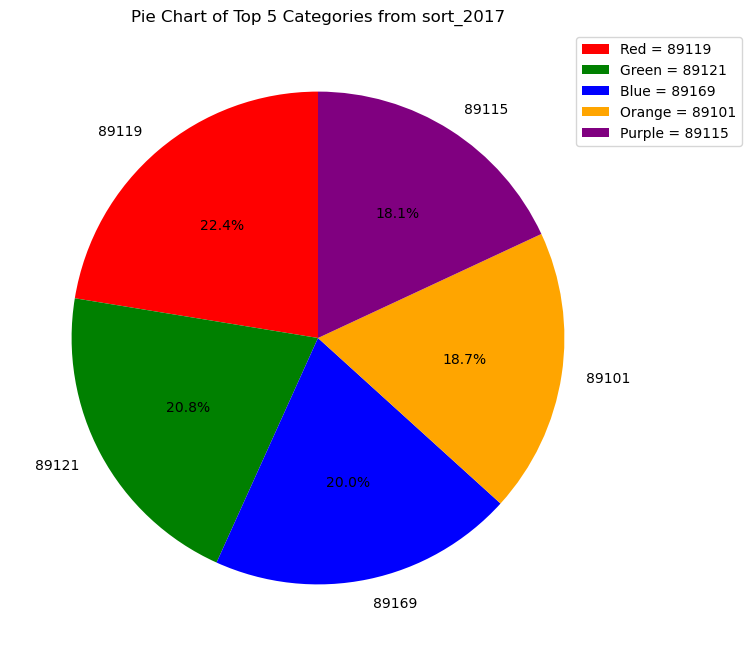

In [121]:
colors = ['red', 'green', 'blue', 'orange', 'purple']
labels = ['Red = 89119', 'Green = 89121', 'Blue = 89169', 'Orange = 89101', 'Purple = 89115', 'Gold = 89102']
plt.figure(figsize=(8, 8))
plt.pie(df_top5['Count'], labels=df_top5['Zipcode'], autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Pie Chart of Top 5 Categories from sort_2017')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

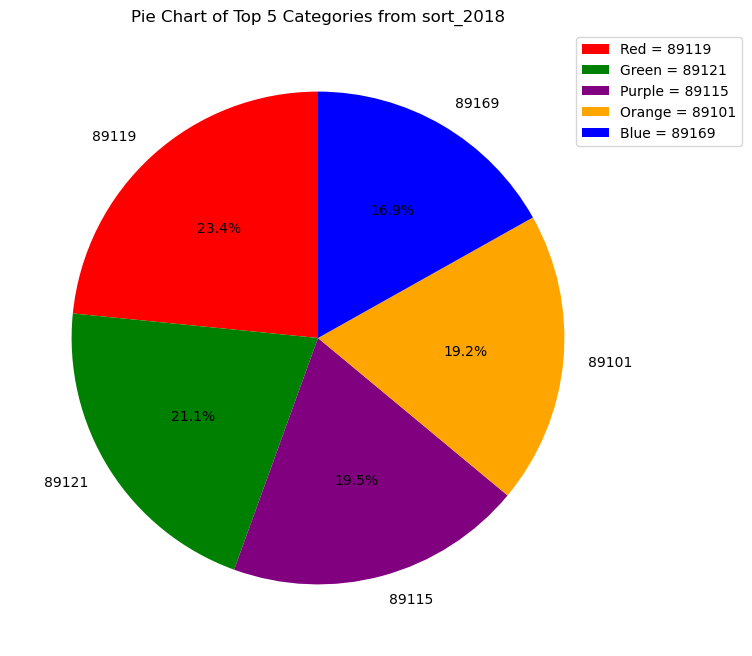

In [122]:
colors_0 = ['red', 'green', 'purple', 'orange', 'blue']
labels_0 = ['Red = 89119', 'Green = 89121', 'Purple = 89115', 'Orange = 89101', 'Blue = 89169']
plt.figure(figsize=(8, 8))
plt.pie(sorted_2018.head(5)['Count'], labels=sorted_2018.head(5)['Zipcode'], autopct='%1.1f%%', startangle=90, colors = colors_0)
plt.title('Pie Chart of Top 5 Categories from sort_2018')
plt.legend(labels_0, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

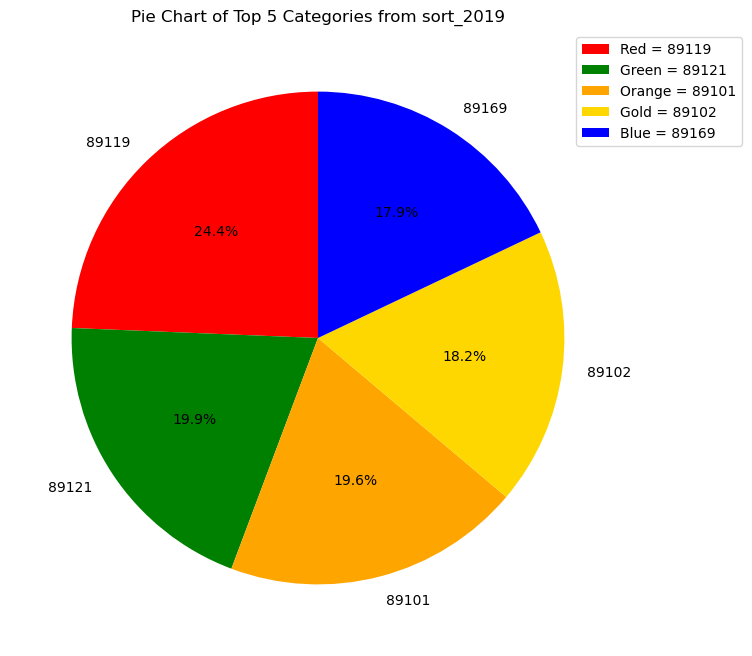

In [123]:
colors_1 = ['red', 'green', 'orange', 'gold' ,'blue']
labels_1 = ['Red = 89119', 'Green = 89121', 'Orange = 89101', 'Gold = 89102', 'Blue = 89169']
plt.figure(figsize=(8, 8))
plt.pie(sorted_2019.head(5)['Count'], labels=sorted_2019.head(5)['Zipcode'], autopct='%1.1f%%', startangle=90, colors = colors_1)
plt.title('Pie Chart of Top 5 Categories from sort_2019')
plt.legend(labels_1, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

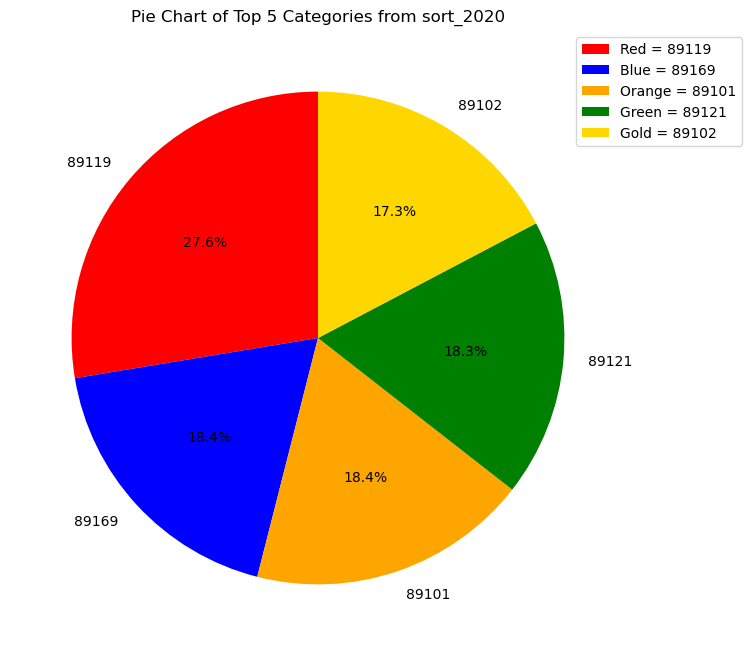

In [124]:
colors_2 = ['red', 'blue', 'orange', 'green', 'gold']
labels_2 = ['Red = 89119', 'Blue = 89169', 'Orange = 89101', 'Green = 89121', 'Gold = 89102']
plt.figure(figsize=(8, 8))
plt.pie(sorted_2020.head(5)['Count'], labels=sorted_2020.head(5)['Zipcode'], autopct='%1.1f%%', startangle=90, colors = colors_2)
plt.title('Pie Chart of Top 5 Categories from sort_2020')
plt.legend(labels_2, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

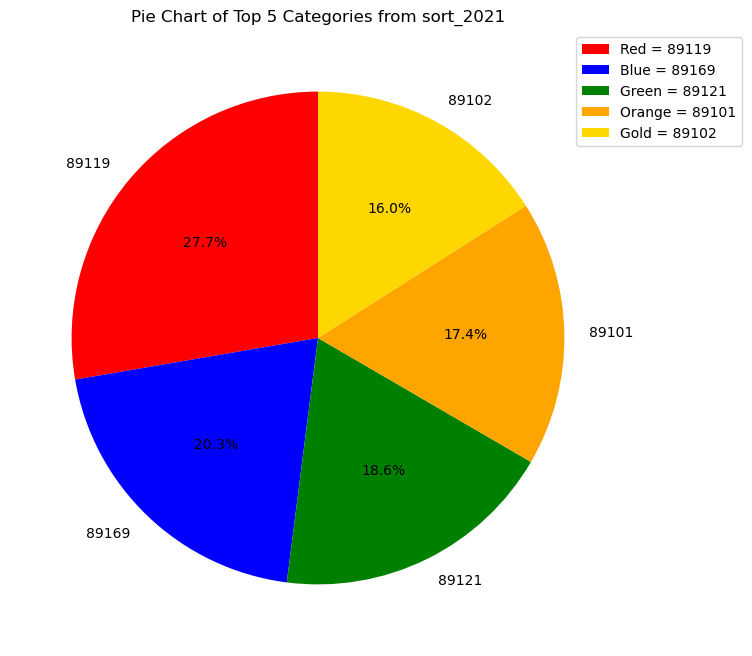

In [125]:
colors_3 = ['red', 'blue', 'green', 'orange', 'gold']
labels_3 = ['Red = 89119', 'Blue = 89169', 'Green = 89121', 'Orange = 89101','Gold = 89102']
plt.figure(figsize=(8, 8))
plt.pie(grouped_2021.head(5)['Count'], labels=grouped_2021.head(5)['Zipcode'], autopct='%1.1f%%', startangle=90, colors = colors_3)
plt.title('Pie Chart of Top 5 Categories from sort_2021')
plt.legend(labels_3, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

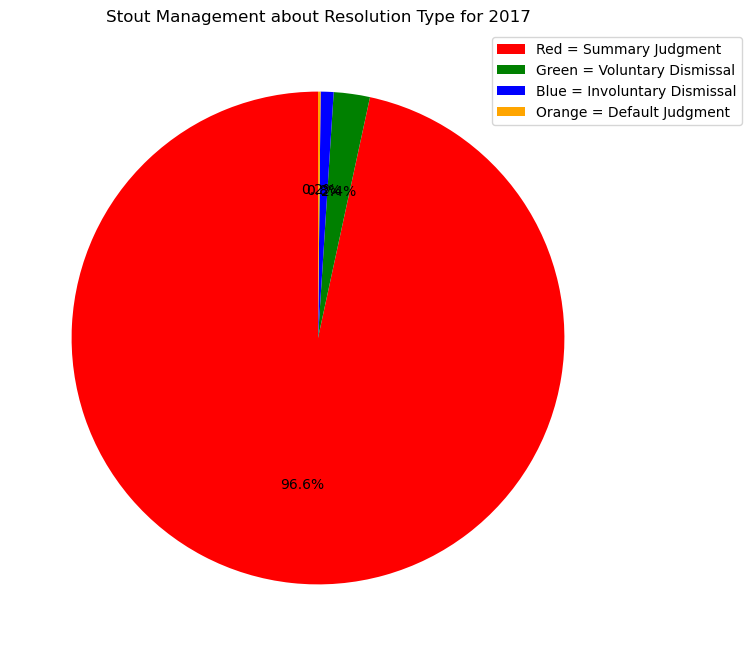

In [126]:
colors = ['red', 'green', 'blue', 'orange']
labels = ['Red = Summary Judgment', 'Green = Voluntary Dismissal', 
          'Blue = Involuntary Dismissal', 'Orange = Default Judgment']
plt.figure(figsize=(8, 8))
plt.pie(stout_2017['Counts'], autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Stout Management about Resolution Type for 2017')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

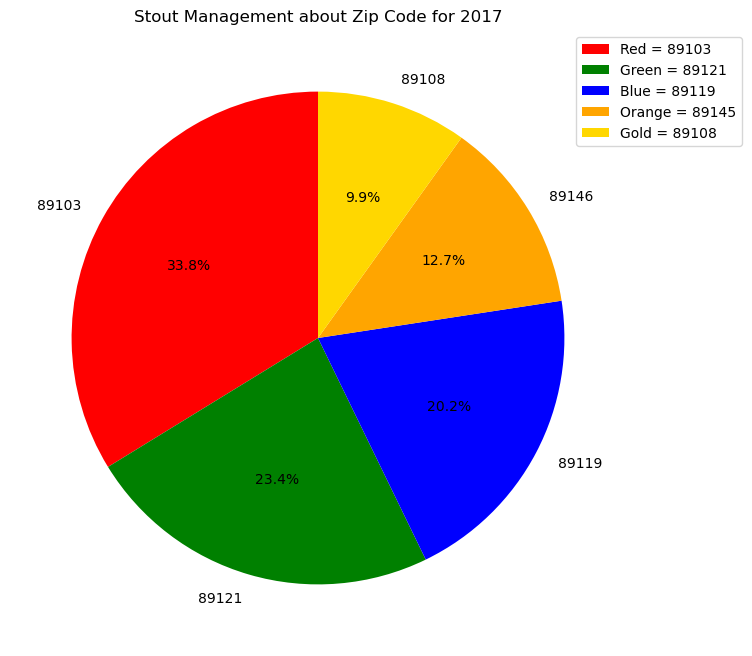

In [127]:
colors = ['red', 'green', 'blue', 'orange', 'gold']
labels = ['Red = 89103', 'Green = 89121', 
          'Blue = 89119', 'Orange = 89145', 'Gold = 89108']
plt.figure(figsize=(8, 8))
plt.pie(stout_2017_zip.head(5)['Counts'], labels=stout_2017_zip.head(5)['index'],
        autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Stout Management about Zip Code for 2017')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

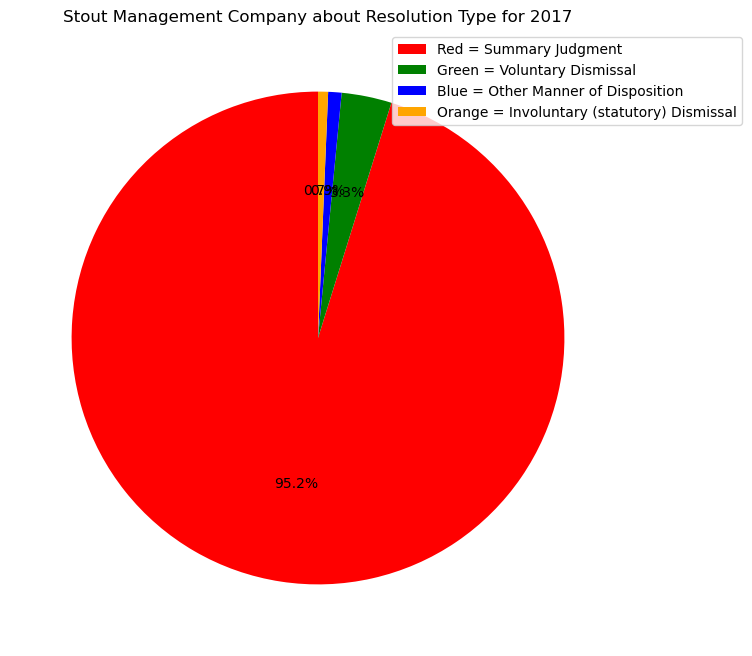

In [128]:
colors = ['red', 'green', 'blue', 'orange']
labels = ['Red = Summary Judgment', 'Green = Voluntary Dismissal', 
          'Blue = Other Manner of Disposition', 'Orange = Involuntary (statutory) Dismissal']
plt.figure(figsize=(8, 8))
plt.pie(stout_c_2017['Counts'], autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Stout Management Company about Resolution Type for 2017')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

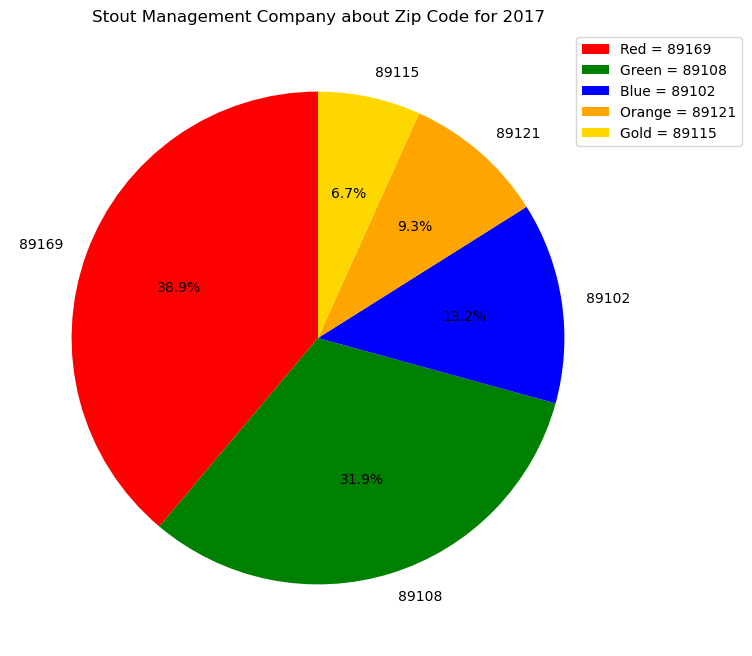

In [129]:
colors = ['red', 'green', 'blue', 'orange', 'gold']
labels = ['Red = 89169', 'Green = 89108', 
          'Blue = 89102', 'Orange = 89121', 'Gold = 89115']
plt.figure(figsize=(8, 8))
plt.pie(stout_c_2017_zip.head(5)['Counts'], labels=stout_c_2017_zip.head(5)['index'],
        autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Stout Management Company about Zip Code for 2017')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

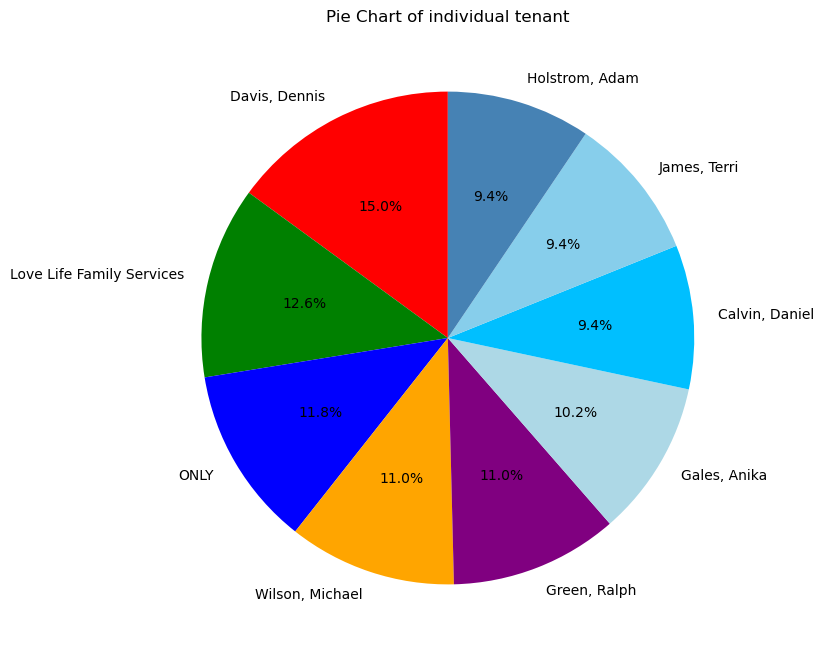

In [130]:
colors = ['red', 'green', 'blue', 'orange', 'purple','lightblue', 'deepskyblue', 'skyblue', 'steelblue']
plt.figure(figsize=(8, 8))
plt.pie(tenant_data_2017_count_new['Counts'], labels=tenant_data_2017_count_new['index'], 
        autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Pie Chart of individual tenant')
plt.show()

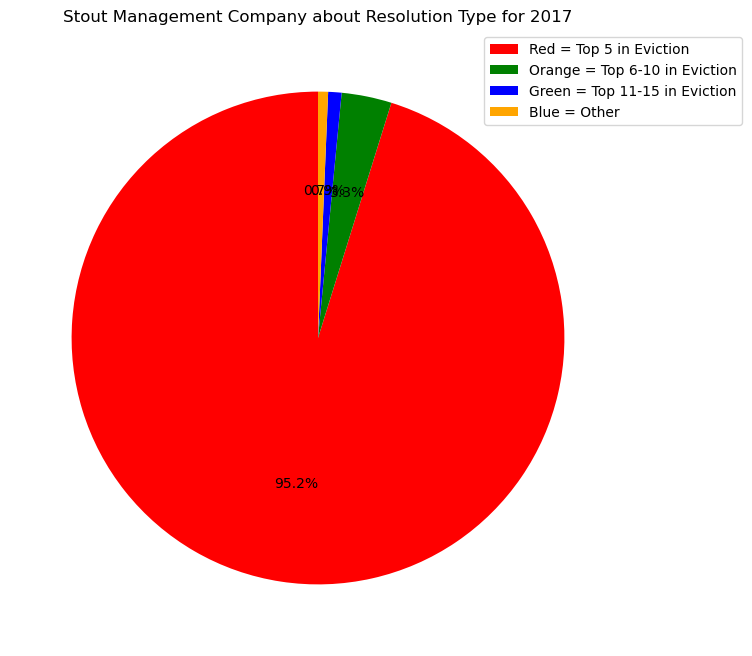

In [131]:
colors = ['red', 'green', 'blue', 'orange']
labels = ['Red = Top 5 in Eviction', 'Orange = Top 6-10 in Eviction' , 'Green = Top 11-15 in Eviction', 
          'Blue = Other']
plt.figure(figsize=(8, 8))
plt.pie(stout_c_2017['Counts'], autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Stout Management Company about Resolution Type for 2017')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()